## Shaharyar Hussain

## Importing Libraries

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading File

In [2]:
df = pd.read_csv("C:/Users/Shaharyar_PC/Desktop/BDA/boston_train.csv")
cols=list(df.columns)
print(cols)

['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


## Data Viewing

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df.shape

(333, 15)

In [53]:
df.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

## Heatmap for Correlation in parameters

Text(0.5, 1.0, 'Correlation')

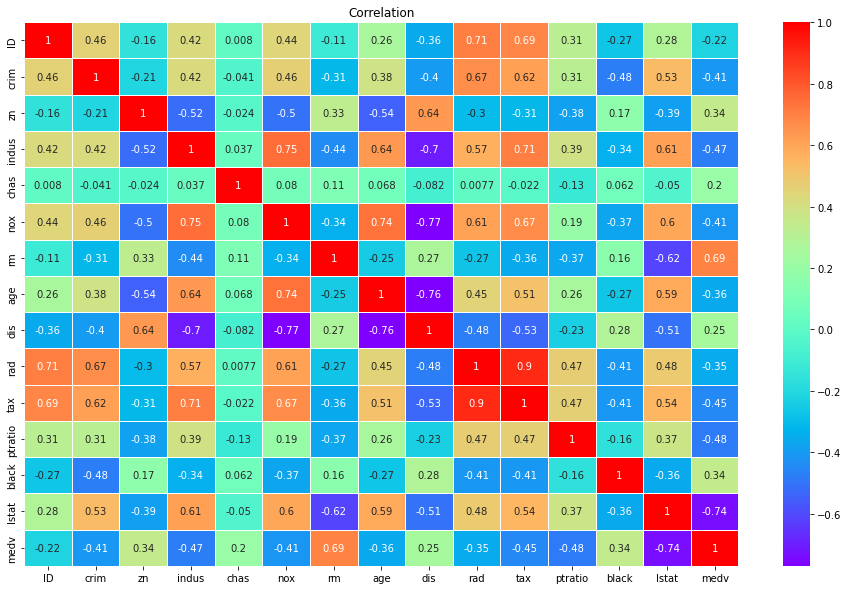

In [51]:
plt.figure(figsize = (16,10))
sns.heatmap(df.iloc[:,:15].corr(),annot=True,cmap="rainbow" , linewidths=1)
plt.title('Correlation')

####      Outcome:          We can clearly see from heatmap, column rad and tax are most correlated columns with other parameters 

## Pairplot among parameters

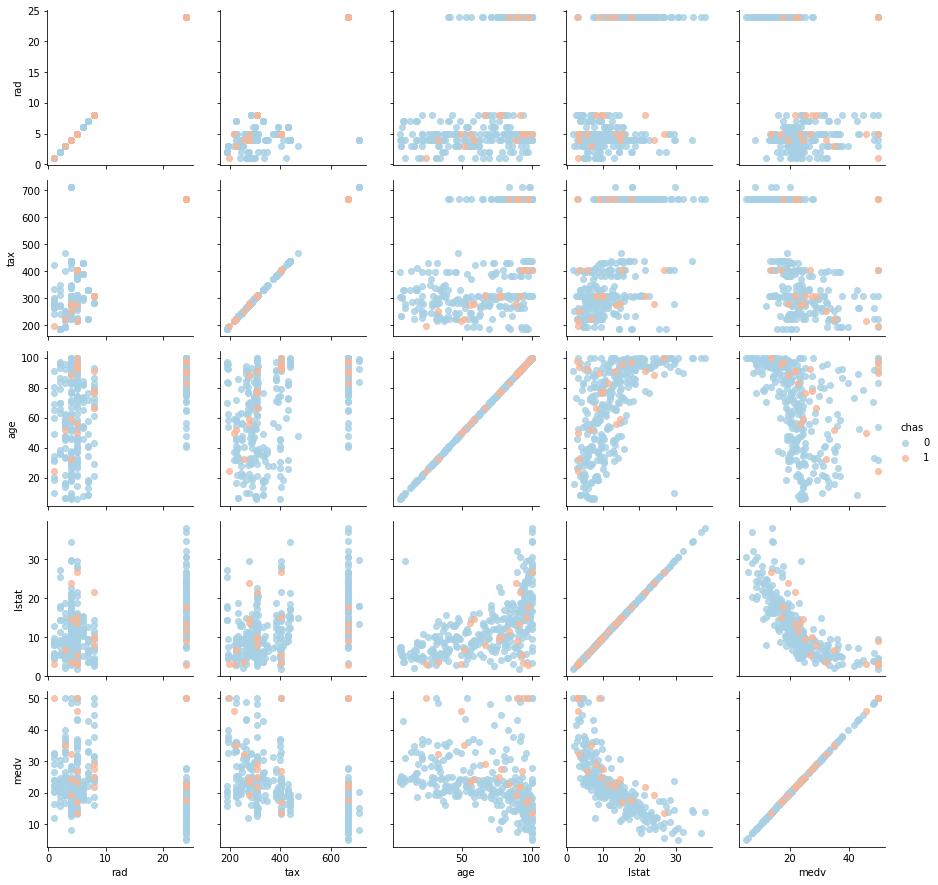

In [55]:
g = sns.PairGrid(df, vars=['rad', 'tax', 'age', 'lstat', 'medv'],
                 hue='chas', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## Data Division for Features and Target Variables

In [29]:
features=df.iloc[:,:14]
print(features)
tv = df['medv']
print(tv)

      ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4      7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
328  500  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
329  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
330  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
331  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
332  506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1  

## Train and Test Split

In [30]:
# dataframe
X = features # Features
y = tv        # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

## Algorithm Selection

In [22]:
def applyRegAlgo(algo, dpth = 3, rdms = 10):
    if algo == "LR":        
        from sklearn.linear_model import LinearRegression
        clfr = LinearRegression()
    elif algo == 'DTreeR':
        from sklearn.tree import DecisionTreeRegressor
        clfr = DecisionTreeRegressor(random_state=rdms, max_depth = dpth)
    elif algo == 'KNNR':
        from sklearn import neighbors
        clfr = neighbors.KNeighborsRegressor(n_neighbors = dpth)  
    return clfr

In [23]:
clf = applyRegAlgo("DTreeR")

In [24]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Results

In [25]:
from sklearn import metrics

In [26]:
def EvIndicator(ytst, yprd):    
    mae = metrics.mean_absolute_error(ytst, yprd)
    mse = metrics.mean_squared_error(ytst, yprd)
    rmse = metrics.mean_squared_error(ytst, yprd)**(0.5)
    rs = metrics.r2_score(ytst, yprd)
    return mae, mse, rmse, rs

In [27]:
MAE, MSE, RMSE, RS = EvIndicator(y_test, y_pred)

In [28]:
print('Evaluation indicators')
print(clf)
print("RMSE:\t",  RMSE)
print("MSE:\t", MSE)
print("MAE:\t", MAE)
print("R-Squared:", RS)
print('###########################################')

Evaluation indicators
DecisionTreeRegressor(max_depth=3, random_state=10)
RMSE:	 4.508901003467507
MSE:	 20.330188259070294
MAE:	 3.5816261904761904
R-Squared: 0.7287315168324433
###########################################
